In [10]:
%matplotlib inline
import sqlite3
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [11]:
conn = sqlite3.connect("Resources/Hawaii.sqlite")


In [12]:
cur = conn.cursor()

In [13]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
#obtain data from cursor via loop - in this case - table names in database file
rows = cur.fetchall()
 
for row in rows:
    print(row)

('measurement',)
('station',)


In [14]:

# Query All Records in the the Database
station_data = pd.read_sql("SELECT station FROM station", conn)
# Preview the Data
station_data.head()

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838


In [20]:
# Query All Records in the the Database
measure_data = pd.read_sql("select * from measurement where date>= Date((Select max(date) from measurement),'-12 months') ", conn)
# Preview the Data
measure_data.head()

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0


In [21]:
# Query All Records in the the Database
measure_data = pd.read_sql("select Date, Prcp from measurement Where date between Date((Select max(date) from measurement),'-12 months')  and (Select max(date) from measurement) order by date asc", conn)

#make Date the Index
measure_data.set_index('date',inplace=True)

# Preview the Data
# measure_data
#measure_data.head()

measure_data.prcp

date
2016-08-23    0.00
2016-08-23    0.15
2016-08-23    0.05
2016-08-23     NaN
2016-08-23    0.02
2016-08-23    1.79
2016-08-23    0.70
2016-08-24    0.08
2016-08-24    2.15
2016-08-24    2.28
2016-08-24     NaN
2016-08-24    1.22
2016-08-24    2.15
2016-08-24    1.45
2016-08-25    0.08
2016-08-25    0.08
2016-08-25    0.00
2016-08-25    0.00
2016-08-25    0.21
2016-08-25    0.06
2016-08-25    0.11
2016-08-26    0.00
2016-08-26    0.03
2016-08-26    0.02
2016-08-26    0.04
2016-08-26    0.00
2016-08-26    0.01
2016-08-27    0.00
2016-08-27    0.18
2016-08-27    0.02
              ... 
2017-08-16    0.00
2017-08-16    0.07
2017-08-16    0.12
2017-08-16    0.42
2017-08-17    0.00
2017-08-17    0.05
2017-08-17    0.01
2017-08-17    0.13
2017-08-18    0.00
2017-08-18    0.00
2017-08-18    0.06
2017-08-18     NaN
2017-08-19    0.00
2017-08-19    0.00
2017-08-19     NaN
2017-08-19    0.09
2017-08-20    0.00
2017-08-20    0.01
2017-08-20     NaN
2017-08-21    0.00
2017-08-21    0.02
2017-08

# Plot the results using the DataFrame plot method





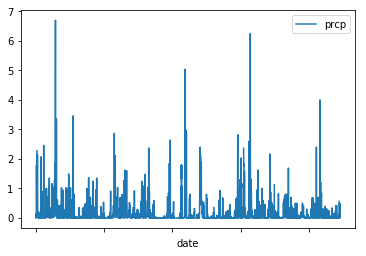

In [45]:
measure_data.plot()


# Print Summary Statistics

In [47]:
measure_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Design a query to calculate the total number of stations.

In [22]:
# Query All Records in the the Database
Station_Count = pd.read_sql("select count(distinct(station)) as'Stations'  from station  ", conn)
# Preview the Data
Station_Count.set_index('Stations',inplace=True)
Station_Count

""
Stations
9


# List the stations and observation counts in descending order.

In [39]:
event_data = pd.read_sql("select m.Station,s.name, count(m.id) as 'observations' from measurement m join 'station' s on m.station=s.station group by m.station,s.name order by count(m.id) desc ", conn)

event_data


,station,name,observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


# Which station has the highest number of observations?
#### Answer: USC00519281 in WAIHEE 837.5, HI US with 2772 observations.

## Design a query to retrieve the last 12 months of temperature observation data (tobs).





In [28]:
# Query All Records in the the Database
temp_data = pd.read_sql("select tobs from measurement Where date >= Date((Select max(date) from measurement),'-12 months')  order by date asc", conn)

#make Date the Index
#measure_data.set_index('date',inplace=True)

# Full data list
# temp_head
# head of data so it isn't too long
temp_data.head()

,tobs
0,81.0
1,76.0
2,80.0
3,80.0
4,80.0


#### Filter by the station with the highest number of observations.

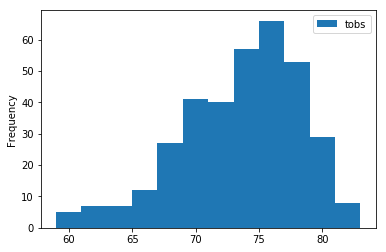

In [22]:
# Query All Records in the the Database
temp_data = pd.read_sql("select tobs from measurement Where station ='USC00519281' and date between Date((Select max(date) from measurement),'-12 months') and (Select max(date) from measurement) order by date asc", conn)

#make Date the Index
#measure_data.set_index('date',inplace=True)


# measure_data
temp_data.plot.hist(bins=12)